In [23]:
setwd("/Users/ahuynh/downloads")
library(DESeq2)
library(tibble)
library(tidyr)
library(readr)

options(repr.matrix.max.rows=600, repr.matrix.max.cols=200) # used to view entire dataframe

# about data I'm using
# 10 Crohn's disease (CD) patients and 10 controls that matched in terms of gender, age, and location.
# first 10 - control
# last 10 - CD

In [24]:
# reading in the counts file
crohns_counts_matrix <- read_tsv("GSE230113_Raw_gene_counts_matrix.tsv")
# crohns_counts_matrix <- crohns_counts_matrix[, -ncol(crohns_counts_matrix)] # removing the last column (bc it wasn't used in study)
crohns_counts_matrix

Rows: 20030 Columns: 21
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): gene_id
dbl (20): Sample1, Sample2, Sample3, Sample4, Sample5, Sample6, Sample7, Sam...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


gene_id,Sample1,Sample2,Sample3,Sample4,Sample5,Sample6,Sample7,Sample8,Sample9,Sample10,Sample11,Sample12,Sample13,Sample14,Sample15,Sample16,Sample17,Sample18,Sample19,Sample20
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1BG,6,15,4,11,19,8,8,15,12,20,23,21,18,17,31,13,11,8,10,13
A1CF,4295,3346,3080,3103,2052,4076,3359,3544,2655,2422,1073,1556,1419,1816,2222,1420,2726,1368,2282,1128
A2M,5102,10756,6628,6739,6126,7738,6233,5039,7565,9853,12383,16519,15108,13421,14277,9764,3256,7831,9523,15820
A2ML1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
A3GALT2,2,2,0,1,2,4,3,1,0,2,3,2,2,1,0,4,5,10,1,7
A4GALT,86,118,96,92,142,100,74,99,129,115,247,194,315,169,105,327,42,176,96,234
A4GNT,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,1,0,0,0,0
AAAS,432,528,496,491,521,478,406,527,427,586,502,582,553,657,540,469,503,497,364,535
AACS,805,803,691,636,399,688,730,740,760,636,667,796,766,1120,730,727,651,696,678,765


In [25]:
# make sample table for all 20 samples and write condition

sample_condition_list <- c(rep("control", 10), rep("crohns", 10))
length(sample_condition_list)

[1] 20

In [26]:
sample_names <- colnames(crohns_counts_matrix)
sample_names <- sample_names[-1] # removes first element of a list (which is the gene ID)
length(sample_names) # shoud be 20

[1] 20

In [27]:
# sample table making cont.

sample_table_df <- data.frame(sample_condition_list) # turn list into data frame
colnames(sample_table_df) <- c("condition") # rename the column header
rownames(sample_table_df) <- sample_names # make the index the list of sample names

# add index to be sample names
sample_table_df


,condition
,<chr>
Sample1,control
Sample2,control
Sample3,control
Sample4,control
Sample5,control
Sample6,control
Sample7,control
Sample8,control
Sample9,control


In [28]:
# now re-work the counts table so the genes are the index (and not a column)

counts_data <- crohns_counts_matrix[, -1]
# remove the first column of genes (bc want that to be the row names instead)
counts_data

Sample1,Sample2,Sample3,Sample4,Sample5,Sample6,Sample7,Sample8,Sample9,Sample10,Sample11,Sample12,Sample13,Sample14,Sample15,Sample16,Sample17,Sample18,Sample19,Sample20
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,15,4,11,19,8,8,15,12,20,23,21,18,17,31,13,11,8,10,13
4295,3346,3080,3103,2052,4076,3359,3544,2655,2422,1073,1556,1419,1816,2222,1420,2726,1368,2282,1128
5102,10756,6628,6739,6126,7738,6233,5039,7565,9853,12383,16519,15108,13421,14277,9764,3256,7831,9523,15820
0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,2,0,1,2,4,3,1,0,2,3,2,2,1,0,4,5,10,1,7
86,118,96,92,142,100,74,99,129,115,247,194,315,169,105,327,42,176,96,234
0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,1,0,0,0,0
432,528,496,491,521,478,406,527,427,586,502,582,553,657,540,469,503,497,364,535
805,803,691,636,399,688,730,740,760,636,667,796,766,1120,730,727,651,696,678,765


In [29]:
gene_names <- crohns_counts_matrix[,1] # extract all rows, first column as a DATAFRAME
# can't use DATAFRAME to set as row name
# you can do
# gene_names <- unlist(gene_names[,1]) OR
# gene_names <- gene_names$gene

gene_names

gene_id
<chr>
A1BG
A1CF
A2M
A2ML1
A3GALT2
A4GALT
A4GNT
AAAS
AACS


In [30]:
gene_names_list <- gene_names$gene_id # extracting just the gene_id column of data frame
rownames(counts_data) <- gene_names_list # set the genes names as index of the counts_data
counts_data

Warning message:
“Setting row names on a tibble is deprecated.”


,Sample1,Sample2,Sample3,Sample4,Sample5,Sample6,Sample7,Sample8,Sample9,Sample10,Sample11,Sample12,Sample13,Sample14,Sample15,Sample16,Sample17,Sample18,Sample19,Sample20
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1BG,6,15,4,11,19,8,8,15,12,20,23,21,18,17,31,13,11,8,10,13
A1CF,4295,3346,3080,3103,2052,4076,3359,3544,2655,2422,1073,1556,1419,1816,2222,1420,2726,1368,2282,1128
A2M,5102,10756,6628,6739,6126,7738,6233,5039,7565,9853,12383,16519,15108,13421,14277,9764,3256,7831,9523,15820
A2ML1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
A3GALT2,2,2,0,1,2,4,3,1,0,2,3,2,2,1,0,4,5,10,1,7
A4GALT,86,118,96,92,142,100,74,99,129,115,247,194,315,169,105,327,42,176,96,234
A4GNT,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,1,0,0,0,0
AAAS,432,528,496,491,521,478,406,527,427,586,502,582,553,657,540,469,503,497,364,535
AACS,805,803,691,636,399,688,730,740,760,636,667,796,766,1120,730,727,651,696,678,765


In [31]:
# need to make sure rows in sample data is in the same order as the counts data
all(rownames(sample_table_df) %in% colnames(counts_data)) # TRUE

[1] TRUE

In [32]:
# perform dge analysis

dds <- DESeqDataSetFromMatrix(countData = counts_data, colData = sample_table_df, design=~ condition)
dds<-DESeq(dds) # performs dge analysis

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 62 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



In [33]:
# visualizing results

resd<-results(dds, contrast=c("condition","control","crohns")) 
# results() generates data frame tables of results between D and N


dge_genes<- subset(resd, padj < 0.05 & abs(log2FoldChange) >= 1)
# filters genes based on padj and log2FC

# dge_genes is DESeqResults object

dge_genes

log2 fold change (MLE): condition control vs crohns 
Wald test p-value: condition control vs crohns 
DataFrame with 2079 rows and 6 columns
         baseMean log2FoldChange     lfcSE      stat      pvalue        padj
        <numeric>      <numeric> <numeric> <numeric>   <numeric>   <numeric>
AAED1     68.1884       -1.25964  0.194734  -6.46852 9.89661e-11 3.51435e-09
ABCA12     5.8374       -5.07755  0.901965  -5.62944 1.80798e-08 3.30934e-07
ABCA8    625.0616        1.61400  0.323975   4.98185 6.29798e-07 7.34125e-06
ABCB1   2089.9903        1.78022  0.214269   8.30835 9.70387e-17 1.38103e-14
ABCB11   212.2625        1.97179  0.406429   4.85150 1.22534e-06 1.31149e-05
...           ...            ...       ...       ...         ...         ...
ZNF648     8.4599       -1.16853  0.336595  -3.47162 5.17336e-04 2.31766e-03
ZNF775   127.4175        1.29060  0.262570   4.91525 8.86698e-07 9.92616e-06
ZNF804A   20.6834       -1.19089  0.422620  -2.81787 4.83434e-03 1.54220e-02
ZNF90    115.

In [34]:
# now identify the DEGs

gene_names <- rownames(dge_genes)
gene_names

[1] "AAED1"        "ABCA12"       "ABCA8"        "ABCB1"       
   [5] "ABCB11"       "ABCC9"        "ABCG2"        "ABCG5"       
   [9] "ACAN"         "ACKR2"        "ACKR4"        "ACOD1"       
  [13] "ACOX1"        "ACOX2"        "ACOXL"        "ACP5"        
  [17] "ACPP"         "ACR"          "ACSF2"        "ACSL1"       
  [21] "ACSL4"        "ACY3"         "ADA"          "ADA2"        
  [25] "ADAM12"       "ADAM8"        "ADAMTS1"      "ADAMTS12"    
  [29] "ADAMTS19"     "ADAMTS2"      "ADAMTS4"      "ADAMTS6"     
  [33] "ADAMTS9"      "ADAMTSL1"     "ADAMTSL2"     "ADCY5"       
  [37] "ADCYAP1"      "ADGB"         "ADGRD1"       "ADGRE1"      
  [41] "ADGRE2"       "ADGRE3"       "ADGRF4"       "ADGRG3"      
  [45] "ADGRL2"       "ADGRV1"       "ADIRF"        "ADM"         
  [49] "ADM2"         "ADORA1"       "ADPRH"        "ADRA1B"      
  [53] "ADRA2C"       "ADRB1"        "ADRB3"        "AFF2"        
  [57] "AGAP11"       "AGFG2"        "AGPAT4"       "AGR2"        
  [61] "AGT"          "AGTRAP"       "AHCYL2"       "AIF1"        
  [65] "AIFM3"        "AIM2"         "AIRE"         "AKAP14"      
  [69] "AKR1B1"       "ALAS2"        "ALCAM"        "ALDH1A2"     
  [73] "ALDH1L1"      "ALDH1L2"      "ALDH3B2"      "ALDOB"       
  [77] "ALOX12"       "ALOX12B"      "ALOX15"       "ALOX15B"     
  [81] "ALOX5AP"      "ALPI"         "ALPL"         "AMACR"       
  [85] "AMPH"         "ANGPT2"       "ANGPTL2"      "ANGPTL4"     
  [89] "ANK1"         "ANK3"         "ANKRD22"      "ANKRD30A"    
  [93] "ANKRD30B"     "ANKRD45"      "ANKRD62"      "ANKRD9"      
  [97] "ANO4"         "ANOS1"        "ANPEP"        "ANXA1"       
 [101] "ANXA5"        "AOX1"         "APBA2"        "APLN"        
 [105] "APOBEC1"      "APOBEC3A"     "APOBEC3B"     "APOBEC3G"    
 [109] "APOBEC3H"     "APOBEC4"      "APOC1"        "APOC2"       
 [113] "APOE"         "APOL1"        "APOL2"        "APOL3"       
 [117] "APOL4"        "APOL6"        "AQP12B"       "AQP3"        
 [121] "AQP7"         "AQP8"         "AQP9"         "AREG"        
 [125] "ARFGAP3"      "ARG2"         "ARHGAP44"     "ARHGDIB"     
 [129] "ARHGEF33"     "ARID5A"       "ARL4C"        "ARNTL2"      
 [133] "ARSJ"         "ART3"         "ASB5"         "ASGR1"       
 [137] "ASGR2"        "ASPHD2"       "ASS1"         "ATF3"        
 [141] "ATP1A2"       "ATP8A2"       "ATRNL1"       "B3GALT5"     
 [145] "B3GAT1"       "B3GNT6"       "B4GALNT4"     "BACE2"       
 [149] "BAIAP3"       "BASP1"        "BATF"         "BATF2"       
 [153] "BATF3"        "BCAT1"        "BCHE"         "BCL2A1"      
 [157] "BCL6"         "BDNF"         "BEAN1"        "BEST1"       
 [161] "BEST4"        "BFSP2"        "BGN"          "BHLHA15"     
 [165] "BHLHE22"      "BHLHE40"      "BIRC3"        "BIRC7"       
 [169] "BLVRA"        "BMP3"         "BMP5"         "BMX"         
 [173] "BNC1"         "BNIP3"        "BSG"          "BST2"        
 [177] "BTBD11"       "BTG2"         "BTK"          "BTN2A2"      
 [181] "BTN3A1"       "BTN3A3"       "C10orf55"     "C10orf82"    
 [185] "C11orf45"     "C11orf86"     "C11orf96"     "C14orf180"   
 [189] "C15orf53"     "C17orf107"    "C17orf113"    "C17orf77"    
 [193] "C18orf65"     "C19orf18"     "C19orf38"     "C1orf61"     
 [197] "C1QA"         "C1QB"         "C1QC"         "C1QTNF4"     
 [201] "C1QTNF7"      "C1R"          "C1S"          "C2"          
 [205] "C20orf202"    "C2CD4A"       "C2CD4B"       "C2orf40"     
 [209] "C2orf54"      "C3AR1"        "C3orf80"      "C4A"         
 [213] "C4B"          "C4BPA"        "C4BPB"        "C4orf50"     
 [217] "C5AR1"        "C6"           "C6orf223"     "C7"          
 [221] "CA1"          "CA10"         "CA14"         "CA2"         
 [225] "CA9"          "CABP7"        "CABYR"        "CACNA1B"     
 [229] "CACNA1E"      "CACNA2D3"     "CADPS"        "CALCA"       
 [233] "CALHM6"       "CALU"         "CAMK1G"       "CAMK2N1"     
 [237] "CAPN13"       "CARD14"       "CARD16"     

In [35]:
# checking to see if hub genes show up in experimental data

hub_genes = c("IL4", "TNF", "CSF2", "IL2", "IL10", "IL17A", "CD8A", "ITGAM", "PTPRC", "IFNG") # adding list of hub genes
validated_genes = c() #empty list

for (i in 1:length(hub_genes)) {
    gene_present <- hub_genes[i] %in% gene_names
    print(paste(hub_genes[i], ": ", gene_present))
    if (hub_genes[i] %in% gene_names == TRUE){
        validated_genes <- append(validated_genes, hub_genes[i] )
        # note: the append doesn't modify original so you need to reassign to update the list
    }
}

validated_genes

# NOD2, IL23R, and ATG16L1 are previously established risk factor genes


[1] "IL4 :  FALSE"
[1] "TNF :  TRUE"
[1] "CSF2 :  TRUE"
[1] "IL2 :  FALSE"
[1] "IL10 :  TRUE"
[1] "IL17A :  TRUE"
[1] "CD8A :  FALSE"
[1] "ITGAM :  TRUE"
[1] "PTPRC :  TRUE"
[1] "IFNG :  TRUE"


[1] "TNF"   "CSF2"  "IL10"  "IL17A" "ITGAM" "PTPRC" "IFNG"

In [36]:
## Figure Generation ####################

In [37]:
#### Heatmaps
install.packages("pheatmap")
library("pheatmap")


The downloaded binary packages are in
	/var/folders/1s/kjzr4l5d64sfx10yxjz7lm940000gn/T//RtmpZa1ND6/downloaded_packages


In [38]:
help(vst)

In [49]:
# getting normalized counts of all genes

vsd <- vst(dds, blind=FALSE)

# extract normalized counts
normalized_counts <- assay(vsd)
normalized_counts


,Sample1,Sample2,Sample3,Sample4,Sample5,Sample6,Sample7,Sample8,Sample9,Sample10,Sample11,Sample12,Sample13,Sample14,Sample15,Sample16,Sample17,Sample18,Sample19,Sample20
A1BG,5.956534,6.190287,5.830782,6.134622,6.364278,6.035937,6.052462,6.261234,6.146601,6.342441,6.462780,6.325881,6.295006,6.219412,6.535957,6.186176,6.169649,6.037020,6.196962,6.153109
A1CF,12.189340,11.548223,11.566244,11.668634,11.106690,12.089421,11.889465,11.876864,11.374273,11.200018,10.234211,10.473165,10.462417,10.629694,11.011460,10.544460,11.620057,10.572273,11.604280,10.115006
A2M,12.433654,13.204863,12.650476,12.767397,12.647928,13.001057,12.766628,12.375088,12.855177,13.185300,13.669412,13.803040,13.795828,13.448443,13.645202,13.255891,11.870145,13.023038,13.635637,13.821514
A2ML1,5.397574,5.397574,5.397574,5.397574,5.397574,5.624880,5.397574,5.397574,5.397574,5.612451,5.397574,5.397574,5.397574,5.397574,5.397574,5.397574,5.397574,5.397574,5.397574,5.609334
A3GALT2,5.721631,5.690185,5.397574,5.622001,5.716465,5.850790,5.800748,5.623684,5.397574,5.701176,5.789870,5.688531,5.701005,5.599440,5.397574,5.838757,5.921458,6.111069,5.653274,5.954871
A4GALT,7.369820,7.466987,7.370473,7.390170,7.801981,7.485844,7.271862,7.467475,7.646409,7.510132,8.397630,7.930100,8.548166,7.753380,7.386218,8.660695,6.860766,8.037440,7.665387,8.185362
A4GNT,5.397574,5.397574,5.397574,5.397574,5.397574,5.397574,5.397574,5.397574,5.397574,5.397574,5.624530,5.688531,5.397574,5.397574,5.397574,5.618809,5.397574,5.397574,5.397574,5.397574
AAAS,9.083082,9.077836,9.118845,9.187663,9.276441,9.186058,9.048166,9.295232,8.948933,9.300291,9.243511,9.184545,9.225990,9.286711,9.135842,9.095064,9.337420,9.239144,9.140624,9.149561
AACS,9.879670,9.608524,9.538101,9.515610,8.946192,9.650187,9.795393,9.731322,9.676091,9.404099,9.605990,9.582476,9.641850,9.977831,9.517015,9.651342,9.668562,9.669693,9.940517,9.603678
AADAC,5.794047,5.397574,5.773094,5.622001,5.397574,6.507689,5.397574,5.623684,5.833241,5.701176,5.994398,6.325881,5.397574,5.397574,5.693763,5.710143,6.500321,5.952468,5.758718,5.819965


In [50]:
# extracting only the counts of hub genes
hub_norm <- normalized_counts[hub_genes, ]
hub_norm

,Sample1,Sample2,Sample3,Sample4,Sample5,Sample6,Sample7,Sample8,Sample9,Sample10,Sample11,Sample12,Sample13,Sample14,Sample15,Sample16,Sample17,Sample18,Sample19,Sample20
IL4,5.397574,5.397574,5.397574,5.397574,5.397574,5.397574,5.397574,5.397574,5.397574,5.397574,5.397574,5.753621,5.397574,5.397574,5.397574,5.397574,5.397574,5.397574,5.397574,5.397574
TNF,6.301227,6.522821,6.228117,6.451387,7.482194,6.073985,7.237985,7.094562,6.747866,7.517942,7.673714,7.418873,8.089720,7.594888,7.162077,7.655580,6.860766,7.839961,6.887828,7.514569
CSF2,5.397574,5.397574,5.397574,5.397574,5.787740,5.397574,5.916955,5.717015,5.616028,5.397574,5.950681,6.185898,6.580150,5.746650,5.908811,6.748284,5.397574,6.075130,5.758718,6.180960
IL2,5.397574,5.859056,5.397574,5.622001,5.847646,5.624880,5.630851,5.901128,5.397574,5.826147,5.789870,5.688531,5.768860,5.599440,5.397574,5.618809,5.397574,5.625271,5.397574,5.763700
IL10,5.721631,5.902677,5.773094,5.785515,5.991184,5.718702,5.800748,6.070480,5.616028,5.612451,6.318584,6.159782,6.827557,6.349138,6.116887,6.124338,5.804258,6.466112,6.156884,6.394122
IL17A,5.721631,5.397574,5.397574,5.397574,5.397574,5.397574,5.916955,5.397574,5.616028,6.001480,6.264382,5.856460,6.037184,5.890052,5.949299,6.124338,5.970839,5.719254,5.397574,5.696781
CD8A,7.847788,8.312748,7.621069,8.152448,8.339269,6.974427,8.192329,8.225781,7.406859,8.564003,8.464167,8.763559,8.739180,7.753380,8.809059,8.556729,7.483027,7.867116,9.174348,8.586733
ITGAM,6.902618,7.865988,7.238849,6.901164,8.539715,7.173416,7.718503,7.846386,7.689474,8.512445,9.223368,8.828351,9.309593,8.272365,8.181705,8.962569,7.143922,8.799057,7.964550,9.252650
PTPRC,9.457957,10.476351,10.032917,9.141156,12.211575,9.183445,11.124698,10.814152,9.485954,11.854042,12.232440,12.378781,12.684533,11.585372,11.469037,12.105372,9.257175,12.139413,11.245664,12.290499
IFNG,5.626957,5.397574,5.397574,5.714643,5.397574,5.397574,5.727120,5.717015,5.397574,5.769068,6.858401,6.516739,6.868154,6.636873,6.022102,6.922501,5.804258,6.718544,6.068905,6.454517


In [41]:
# condition vector for annoatating
sample_condition_list

[1] "control" "control" "control" "control" "control" "control" "control"
 [8] "control" "control" "control" "crohns"  "crohns"  "crohns"  "crohns" 
[15] "crohns"  "crohns"  "crohns"  "crohns"  "crohns"  "crohns"

In [42]:
# create data frame containing sample names and conditions (extracting from existing df)
sample_annotation <- data.frame(Sample = colnames(sample_table_df), Condition = sample_condition_list)
sample_annotation

Sample,Condition
<chr>,<chr>
condition,control
condition,control
condition,control
condition,control
condition,control
condition,control
condition,control
condition,control
condition,control


In [43]:
rownames(sample_annotation) <- colnames(hub_norm)

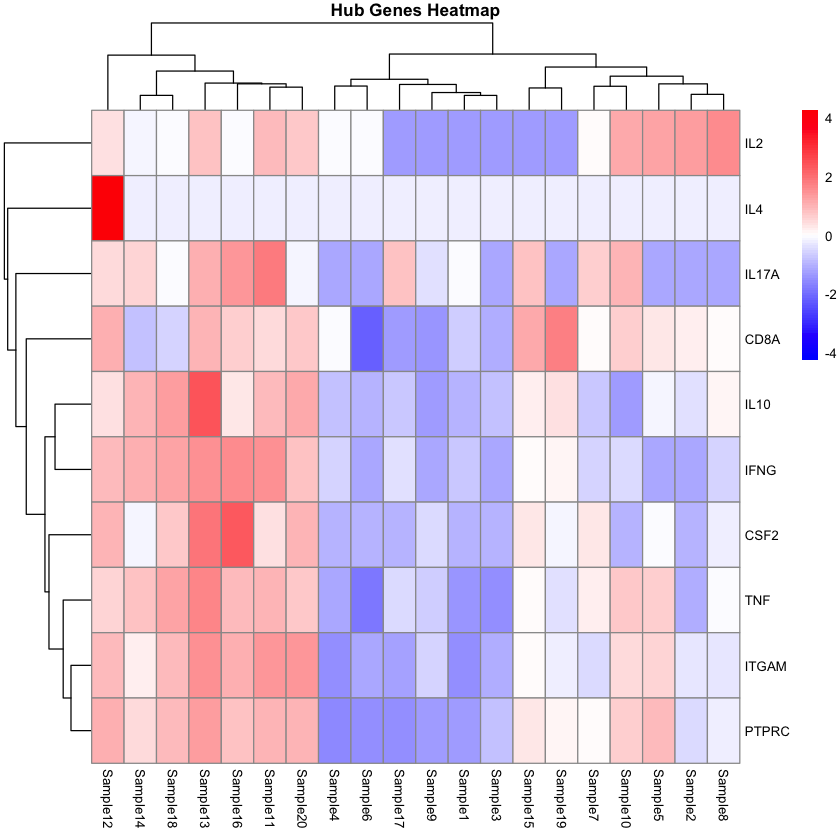

In [44]:
# Create the heatmap (w/out annotations)
pheatmap(hub_norm,
         cluster_rows = TRUE,    # Cluster rows (genes)
         cluster_cols = TRUE,    # Cluster columns (samples)
         scale = "row",          # Scale rows (genes) for better visualization
         color = colorRampPalette(c("blue", "white", "red"))(100),  # Choose a color palette
         main = "Hub Genes Heatmap",  # Heatmap title
         fontsize = 8,     # Adjust fontsize for gene names
        )   # Adding annotation          

In [45]:
# Heatmap with annotations (need a data frame where row names = sample names and df value is the condition)
# turn sample_condition_list -> data frame
s_c <- as.data.frame(list(Condition = sample_condition_list))
s_c

Condition
<chr>
control
control
control
control
control
control
control
control
control


In [46]:
rownames(s_c) <- colnames(hub_norm)
s_c

,Condition
,<chr>
Sample1,control
Sample2,control
Sample3,control
Sample4,control
Sample5,control
Sample6,control
Sample7,control
Sample8,control
Sample9,control


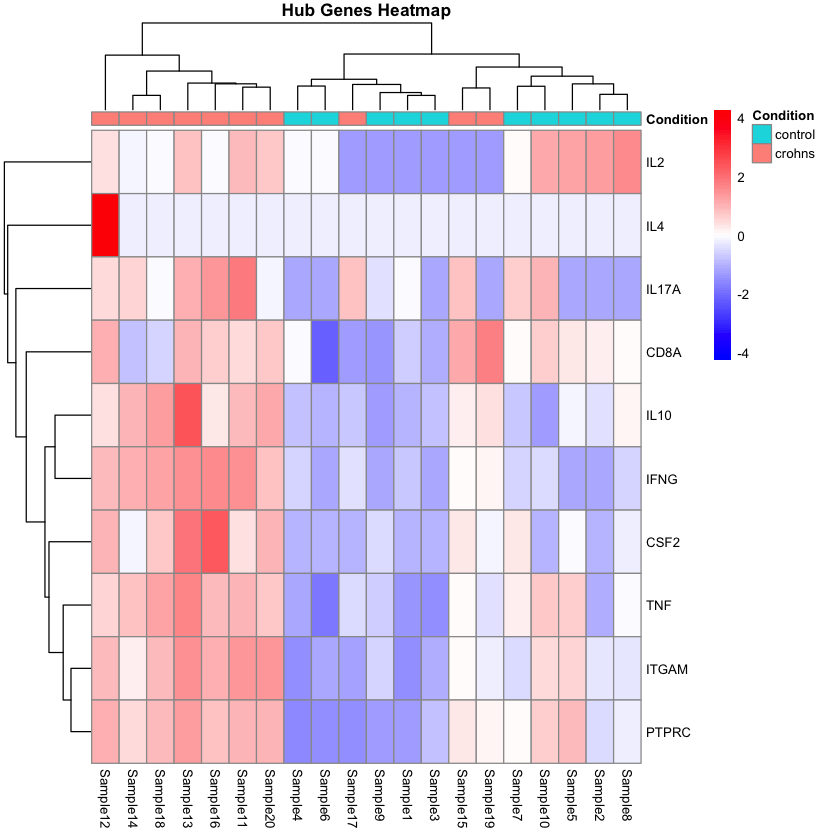

In [47]:
pheatmap(hub_norm,
         cluster_rows = TRUE,    
         cluster_cols = TRUE,    
         scale = "row",          
         color = colorRampPalette(c("blue", "white", "red"))(100),  
         main = "Hub Genes Heatmap",  
         fontsize = 8,
         annotation_col = s_c)

In [48]:
##### NOTES

# Since NOD2, IL23R, and ATG16L1 don't appear in hub genes, we can try to do molecular docking on hub genes
# and see if the risk factor genes (NOD2, IL23R, and ATG16L1) have similar binding energy to the candidate drugs

# not necessary: sorting the results
# dge_genes_sorted <- dge_genes[order(dge_genes$padj),] # smallest to biggest